In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('Top 100 Greatest Hollywood Actors of All Time.csv')

award_features = ['Oscars', 'Oscar Nominations', 'BAFTA', 'BAFTA Nominations', 'Golden Globes', 'Golden Globe Nominations']
award_data = df[award_features]

kmeans_awards = KMeans(n_clusters=3, random_state=42)
award_clusters = kmeans_awards.fit_predict(award_data)
df['Award_Cluster'] = award_clusters

In [19]:
birth_data = pd.get_dummies(df[['Date of Birth', 'Place of Birth']])

kmeans_birth = KMeans(n_clusters=3, random_state=42)
birth_clusters = kmeans_birth.fit_predict(birth_data)
df['Birth_Cluster'] = birth_clusters

In [20]:
award_cluster_centers = kmeans_awards.cluster_centers_
birth_cluster_centers = kmeans_birth.cluster_centers_

cos_sim = cosine_similarity(award_cluster_centers, birth_cluster_centers)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 6 while Y.shape[1] == 193

In [16]:
print(cos_sim)

NameError: name 'cos_sim' is not defined

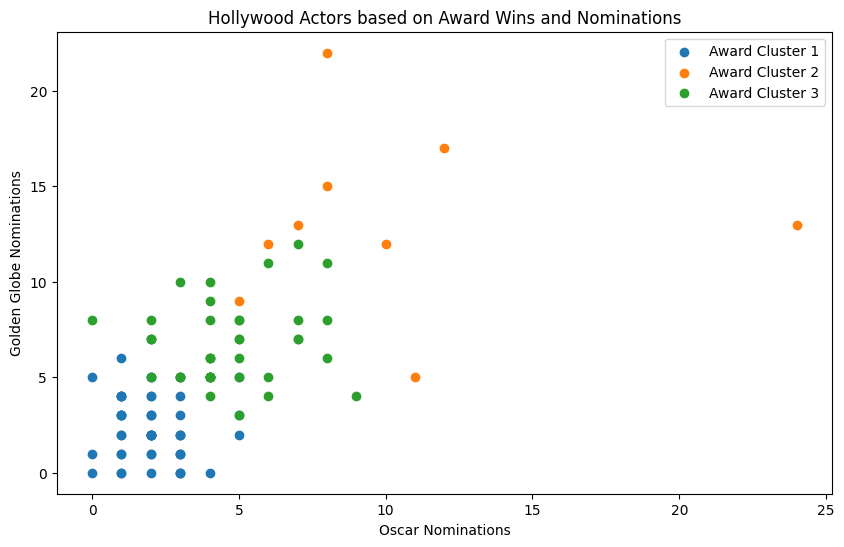

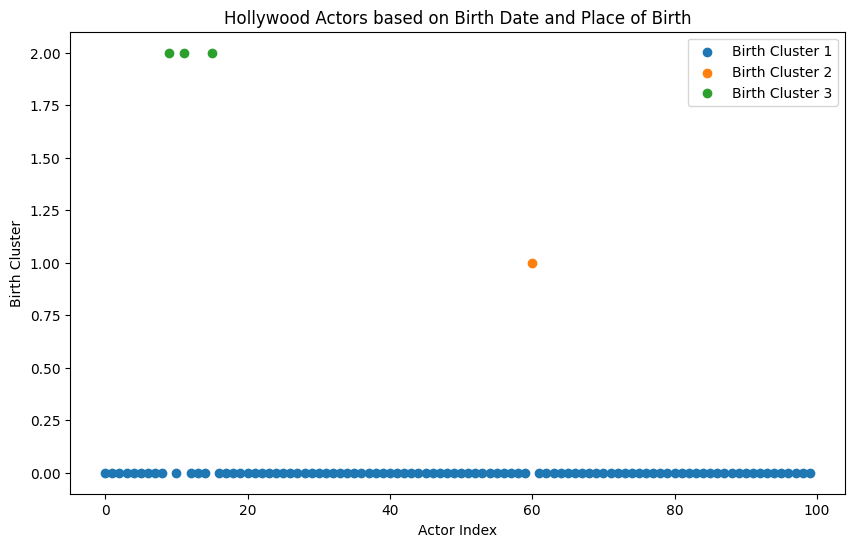

In [21]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = df[df['Award_Cluster'] == cluster]
    plt.scatter(cluster_data['Oscar Nominations'], cluster_data['Golden Globe Nominations'], label=f'Award Cluster {cluster + 1}')

plt.title('Hollywood Actors based on Award Wins and Nominations')
plt.xlabel('Oscar Nominations')
plt.ylabel('Golden Globe Nominations')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = df[df['Birth_Cluster'] == cluster]
    plt.scatter(cluster_data.index, [cluster] * len(cluster_data), label=f'Birth Cluster {cluster + 1}')

plt.title('Hollywood Actors based on Birth Date and Place of Birth')
plt.xlabel('Actor Index')
plt.ylabel('Birth Cluster')
plt.legend()
plt.show()